In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [5]:
asthma_df=pd.read_csv("csv datasets/asthma.csv")

In [6]:
asthma_df.head()

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,HEPA,1.5,M,False,False,False,False,False,False,False
1,RV5,28.0,F,False,True,True,True,False,True,True
2,FLU3,53.0,F,False,False,False,False,False,False,False
3,HEP,69.0,M,False,False,False,False,False,False,False
4,HEPA,24.0,F,False,False,True,True,False,True,True


In [7]:
print("Number of rows:",asthma_df.shape[0])
print("Number of columns:",asthma_df.shape[1])

Number of rows: 309226
Number of columns: 10


In [8]:
asthma_df["SEX"].value_counts()

SEX
F    163769
M     87907
U     57550
Name: count, dtype: int64

# checking info of the dataset

In [9]:
asthma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309226 entries, 0 to 309225
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAX_TYPE         309226 non-null  object 
 1   AGE_YRS          245860 non-null  float64
 2   SEX              309226 non-null  object 
 3   SLEEPING_PROB    309226 non-null  bool   
 4   CHEST_TIGHTNESS  309226 non-null  bool   
 5   BREATH           309226 non-null  bool   
 6   COUGH            309226 non-null  bool   
 7   ALLERGY          309226 non-null  bool   
 8   WHEEZING         309226 non-null  bool   
 9   ASTHMA           309226 non-null  bool   
dtypes: bool(7), float64(1), object(2)
memory usage: 9.1+ MB


> There are 2 categorical values,1 floating and 7 boolean values

In [10]:
asthma_df.describe()

,AGE_YRS
count,245860.000000
mean,33.722317
std,26.766124
min,0.000000
25%,8.000000
50%,29.000000
75%,60.000000
max,112.000000


# Data Preprocessing

checking null values

In [11]:
asthma_df.isnull().sum()

VAX_TYPE               0
AGE_YRS            63366
SEX                    0
SLEEPING_PROB          0
CHEST_TIGHTNESS        0
BREATH                 0
COUGH                  0
ALLERGY                0
WHEEZING               0
ASTHMA                 0
dtype: int64

> Since there is null values in Age column, let's fill it up with mean value of age column

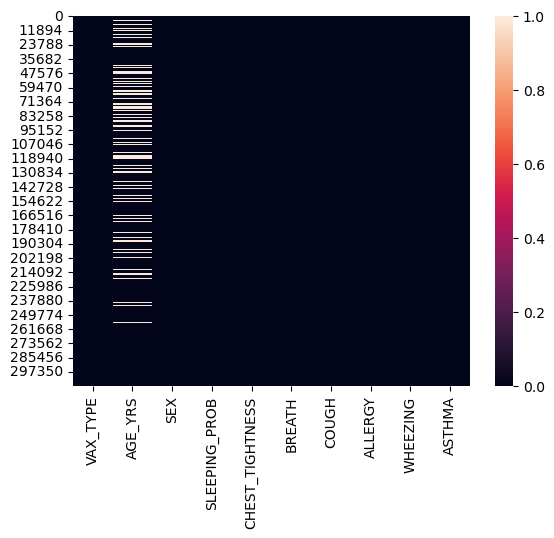

In [12]:
sns.heatmap(asthma_df.isnull())
plt.show()

In [13]:
asthma_mean=asthma_df["AGE_YRS"].mean()
asthma_mean

33.7223169283332

In [14]:
asthma_df["AGE_YRS"]=asthma_df["AGE_YRS"].fillna(asthma_mean)

In [15]:
asthma_df.isnull().sum()

VAX_TYPE           0
AGE_YRS            0
SEX                0
SLEEPING_PROB      0
CHEST_TIGHTNESS    0
BREATH             0
COUGH              0
ALLERGY            0
WHEEZING           0
ASTHMA             0
dtype: int64

>Since there are no null values, we can proceed with the further analysis

Label encoding

In [16]:
label_encoder = LabelEncoder()

In [17]:
asthma_df['SEX']= label_encoder.fit_transform(asthma_df['SEX'])

In [18]:
asthma_df['SLEEPING_PROB']= label_encoder.fit_transform(asthma_df['SLEEPING_PROB'])

In [19]:
asthma_df['CHEST_TIGHTNESS']= label_encoder.fit_transform(asthma_df['CHEST_TIGHTNESS'])

In [20]:
asthma_df['BREATH']= label_encoder.fit_transform(asthma_df['BREATH'])

In [21]:
asthma_df['COUGH']= label_encoder.fit_transform(asthma_df['COUGH'])

In [22]:
asthma_df['ALLERGY']= label_encoder.fit_transform(asthma_df['ALLERGY'])

In [23]:
asthma_df['WHEEZING']= label_encoder.fit_transform(asthma_df['WHEEZING'])

In [24]:
asthma_df['ASTHMA']= label_encoder.fit_transform(asthma_df['ASTHMA'])

In [25]:
asthma_df.head()

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,HEPA,1.5,1,0,0,0,0,0,0,0
1,RV5,28.0,0,0,1,1,1,0,1,1
2,FLU3,53.0,0,0,0,0,0,0,0,0
3,HEP,69.0,1,0,0,0,0,0,0,0
4,HEPA,24.0,0,0,0,1,1,0,1,1


# Data Analysis

Which gender is suffering more from asthma ? 

In [26]:
asthma_gen=asthma_df.groupby("SEX").size()
asthma_gen

SEX
0    163769
1     87907
2     57550
dtype: int64

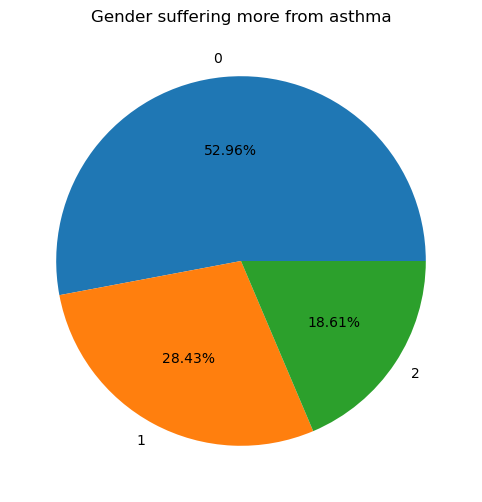

In [27]:
asthma_gen.plot(kind='pie',autopct="%.2f%%",figsize=(12,6))
plt.title("Gender suffering more from asthma")
plt.show()

> As we see above females are suffering more from asthma ,almost more than 50% comparing to other two genders.

Which age group has been more affected by asthma ?

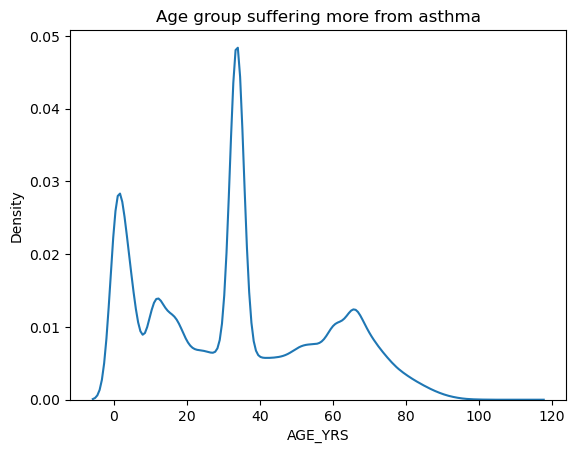

In [28]:
sns.kdeplot(data=asthma_df, x="AGE_YRS")
plt.title("Age group suffering more from asthma")
plt.show()

> The age group between 25-40 is suffering more from asthma

Do all the asthma patients have wheezing problem ?

In [32]:
asthma_wheez=asthma_df[asthma_df["ASTHMA"]==1].groupby("WHEEZING").size()
asthma_wheez

WHEEZING
0    14421
1     2230
dtype: int64

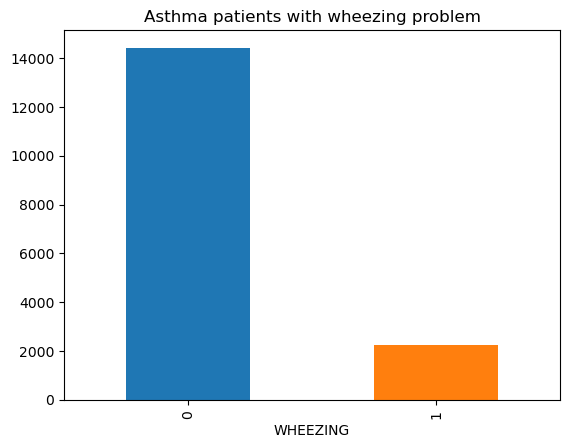

In [30]:
asthma_wheez.plot(kind='bar',color=sns.color_palette())
plt.xticks(rotation=90)
plt.title("Asthma patients with wheezing problem")
plt.show()

> From the above plot we can infer that not all the asthma patients have wheezing.
> There are more asthma patients who have no wheezing problems. 

Which gender group suffers more from allergy problem ?

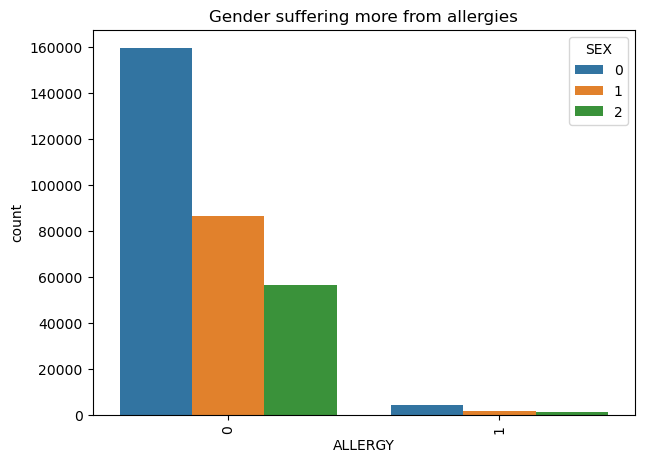

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(data=asthma_df,x=asthma_df['ALLERGY'],hue="SEX")
plt.xticks(rotation=90)
plt.title("Gender suffering more from allergies")
plt.show()

> There very less asthma patients suffering from allergies, but in those who suffers from allergies male are comparitively more.

Do all the people suffering from sleeping problem have asthma ?

In [29]:
ast_spl=asthma_df[asthma_df["SLEEPING_PROB"]==1].groupby("ASTHMA").size()
ast_spl

ASTHMA
0    699
1    994
dtype: int64

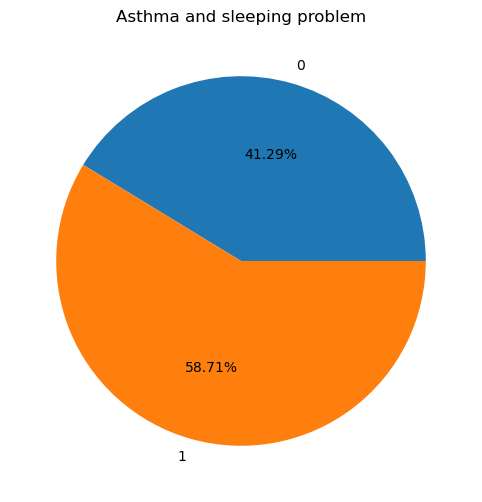

In [30]:
ast_spl.plot(kind='pie',autopct="%.2f%%",figsize=(12,6))
plt.title("Asthma and sleeping problem")
plt.show()

> There are more people with sleeping issues and asthma

Which age group suffers more from allergies ?

In [31]:
ast_ale=asthma_df[asthma_df["ALLERGY"]==1]
ast_ale

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
16,RV5,28.000000,0,0,0,0,0,1,0,0
30,HPV9,33.722317,0,0,0,0,0,1,0,0
49,PPV,33.722317,2,0,0,0,0,1,0,0
101,PNC13,33.722317,0,0,0,0,0,1,0,0
274,MENB,33.722317,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
308953,PPV,16.000000,1,0,0,0,0,1,0,1
308955,DTAPIPV,21.000000,0,0,0,0,0,1,0,1
309022,UNK,0.500000,1,0,0,0,0,1,0,1
309147,FLU3,64.000000,0,0,0,0,0,1,0,1


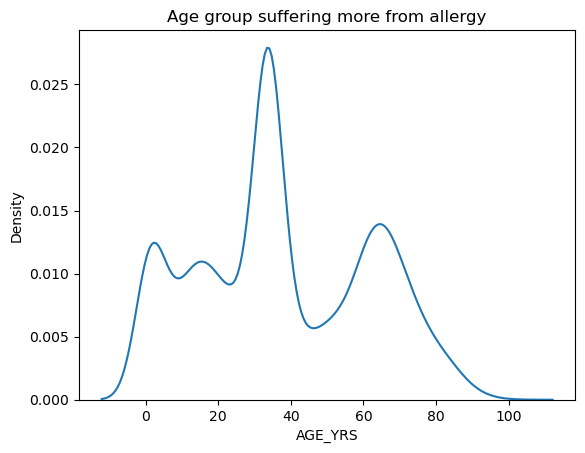

In [32]:
sns.kdeplot(data=ast_ale, x="AGE_YRS")
plt.title("Age group suffering more from allergy")
plt.show()

> Age between 20-40 are prone to allergies

Does vaccination have any affect on people with asthma ?

let us consider the top vaccination 

In [33]:
asthma_df["VAX_TYPE"].value_counts()

VARCEL     27544
FLU3       25727
VARZOS     23101
HPV4       19782
TDAP       19497
           ...  
H5N1           4
HEPATYP        4
SSEV           2
PLAGUE         2
MNC            2
Name: VAX_TYPE, Length: 86, dtype: int64

In [34]:
ast_vac=asthma_df[asthma_df["VAX_TYPE"]=="VARCEL"].groupby("ASTHMA").size()
ast_vac

ASTHMA
0    25831
1     1713
dtype: int64

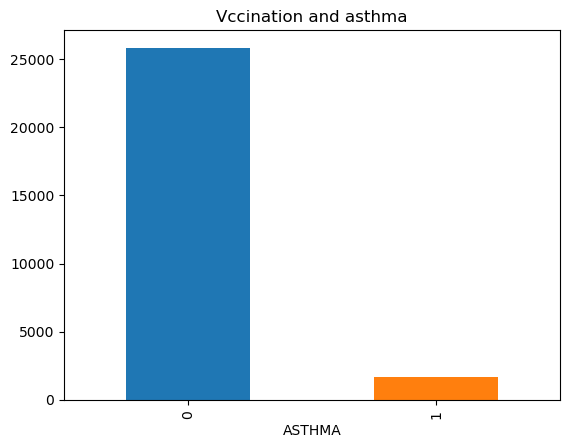

In [38]:
ast_vac.plot(kind="bar",color=sns.color_palette())
plt.title("Vccination and asthma")
plt.show()

> Number of people suffering from asthma is less when vaccinated.

Which gender suffers more from chest tightness ?

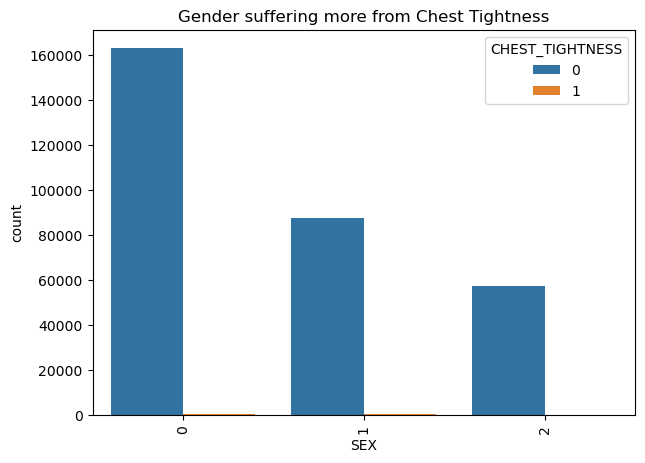

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(data=asthma_df,x=asthma_df['SEX'],hue="CHEST_TIGHTNESS")
plt.xticks(rotation=90)
plt.title("Gender suffering more from Chest Tightness")
plt.show()

> As we can see there is minimal amount of people suffering from chest tightness in each gender.So, chest tightness is not much related to asthma.

Which gender suffers more from cough ?

In [85]:
ast_cou=asthma_df.groupby("SEX")["COUGH"].size()
ast_cou

SEX
0    163769
1     87907
2     57550
Name: COUGH, dtype: int64

In [1]:
ast_cou.plot(kind='pie',autopct="%.2f%%",figsize=(12,6), color= ['lightpink', 'lightgreen','ye'])
plt.title("Asthma and coughing problem")
plt.show()

NameError: name 'ast_cou' is not defined

> Male suffers more from coughing problem

Do males suffering from asthma have cough ?

In [107]:
asth_cou=asthma_df[asthma_df["ASTHMA"]==1]
asth_cou

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
1,RV5,28.00,0,0,1,1,1,0,1,1
4,HEPA,24.00,0,0,0,1,1,0,1,1
7,PPV,1.58,0,0,0,1,1,0,0,1
14,HIBV,13.00,0,1,0,1,1,0,0,1
25,RV5,28.00,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
309204,MNQ,47.00,0,0,0,0,1,0,0,1
309206,MNQ,44.00,0,0,0,0,1,0,0,1
309213,SMALL,59.00,0,0,0,0,1,0,0,1
309217,SMALL,53.00,0,0,0,0,1,0,1,1


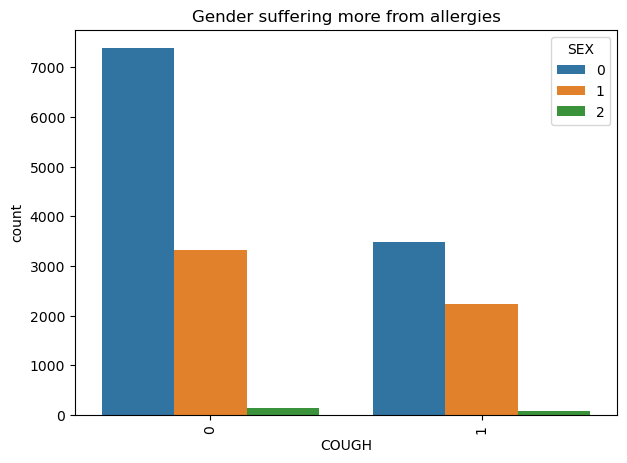

In [108]:
plt.figure(figsize=(7,5))
sns.countplot(data=asth_cou,x=asth_cou['COUGH'],hue="SEX")
plt.xticks(rotation=90)
plt.title("Gender suffering more from allergies")
plt.show()

>Male suffering from asthma have high cough rate comparing to other genders.

Do children below age of 12 have chest tightness ?

In [34]:
ast_che=asthma_df[asthma_df["AGE_YRS"] < 12].groupby("CHEST_TIGHTNESS").size()
ast_che

CHEST_TIGHTNESS
0    73664
1       21
dtype: int64

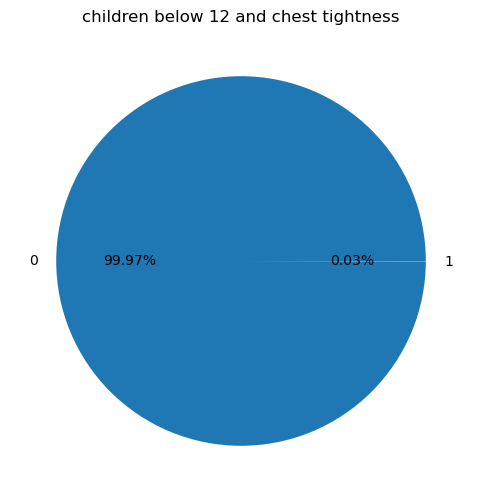

In [121]:
ast_che.plot(kind="pie",autopct="%.2f%%",figsize=(12,6))
plt.title("children below 12 and chest tightness")
plt.show()

> From the above plot we can say that children do not suffer from chest tightness

Does chest tightness increase with age ?

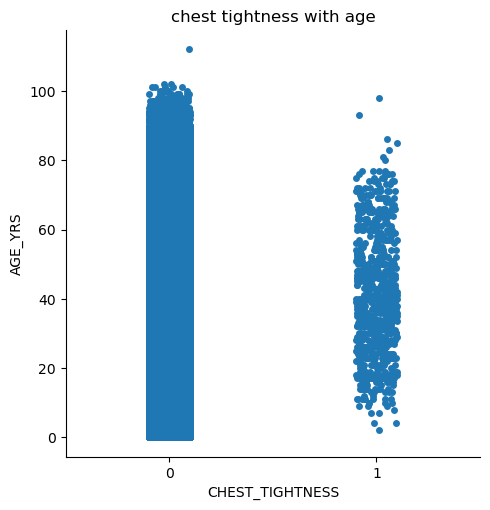

In [128]:
sns.catplot(x="CHEST_TIGHTNESS",y="AGE_YRS",data=asthma_df)
plt.title("chest tightness with age")
plt.show()

> We can see from the above plot that chest tightness is more between the age of 25-45 and later it is becoming less denser.

# Conclusion

1. Females suffer more from asthma.
2. Age group 25-40 suffer more from asthma.
3. Not all the asthma patients have wheezing problem.
4. Males are more than other genders.
5. Chest tightness slightly decrease with age.
6. People with asthma has sleeping issues.